<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0305_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 정규식(2)
*, + 의 차이 
- "*" = 0개 이상 있는지 
- "+" = 1개 이상 있는지

In [1]:
import re

In [2]:
re.match('a*b','b')
# b 첮음
# a가 0개 이상 있으면 b를 찾을 수 있음

<re.Match object; span=(0, 1), match='b'>

In [3]:
re.match('a+b','b')
# b 못 찾음
# a가 1개 이상 있어야 b를 찾을 수 있음

In [4]:
re.match('a*b','ab')

<re.Match object; span=(0, 2), match='ab'>

In [5]:
re.match('a+b','ab')

<re.Match object; span=(0, 2), match='ab'>

In [6]:
# 특수문자 있는 경우 = \ 입력
re.search('\*', '123*3')

<re.Match object; span=(3, 4), match='*'>

In [7]:
re.search('\*', '123****3')

<re.Match object; span=(3, 4), match='*'>

In [8]:
# 특수문자 다 찾을 경우
re.search('\*+', '123****3')

<re.Match object; span=(3, 7), match='****'>

정규식 요약 설명
- \d : [0-9]
- \D : [^0-9] : 숫자를 제외한 모든 문자
- \w : [a-zA-Z0-9_]와 같음, 영문, 대소문자, 밑줄문자, 숫자
- \W : [^a-zA-Z0-9_]와 같음, 영문, 대소문자, 밑줄문자, 숫자 제외한 모든 문자


In [9]:
re.match('\d','123123123124123123')

<re.Match object; span=(0, 1), match='1'>

In [10]:
re.match('\d+','123123123124123123')

<re.Match object; span=(0, 18), match='123123123124123123'>

In [11]:
re.match('\D+','123123123124123123')

In [13]:
re.search('\D+','123123123124123123dsadfa')

<re.Match object; span=(18, 24), match='dsadfa'>

In [14]:
re.match('\w','Python_Python_123123123123')

<re.Match object; span=(0, 1), match='P'>

In [15]:
re.match('\w+','Python_Python_123123123123')

<re.Match object; span=(0, 26), match='Python_Python_123123123123'>

In [16]:
re.match('\W+','Python_Python_123123123123!!!!!')

In [17]:
re.search('\W+','Python_Python_123123123123!!!!!')

<re.Match object; span=(26, 31), match='!!!!!'>

공백 처리
- ' '로 공백 넣어도 되고, \s \S로 표현 가능


In [18]:
re.match('[a-z0-9]','hello 12345')

<re.Match object; span=(0, 1), match='h'>

In [19]:
re.match('[a-z0-9]+','hello 12345')

<re.Match object; span=(0, 5), match='hello'>

In [20]:
# 공백도 찾는 경우
re.match('[a-z0-9 ]+','hello 12345')

<re.Match object; span=(0, 11), match='hello 12345'>

In [22]:
# 공백도 찾는 경우
re.match('[a-z0-9\s]+','hello 12345')

<re.Match object; span=(0, 11), match='hello 12345'>

### Group 사용하기
- (정규표현식)(정규표현식) 그룹으로 묶을 수 있음
- 객체를 넣을 변수.group(그룹의 숫자)

In [23]:
df_re = re.match('([0-9]+) ([a-z]+)', '1234 abc')

In [24]:
df_re.group(1)

'1234'

In [25]:
df_re.group(2)

'abc'

In [26]:
df_re.group(0)

'1234 abc'

In [27]:
df_re.groups()

('1234', 'abc')

### 기존 함수를 이용해서 문자열 응용하기
- findall : re.findall('패턴','문자열')

In [28]:
# 리스트화
re.findall('[0-9]+','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123') 

['1231', '123123', '3123']

In [29]:
a = re.findall('[0-9]+','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')
a

['1231', '123123', '3123']

In [30]:
re.findall('[가-힣]+','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')

['여러분', '숫자를', '다', '가지고', '올', '까요']

문자열 바꿀 수 있음
- re.sub('패턴', '바꿀문자열', '문자열', 바꿀횟수)

In [31]:
re.sub('[0-9]+','hi','여러분 1231 숫자를 123123 다 가지고 올 까요?!@3123')
# 숫자가 모두 hi로 바뀜

'여러분 hi 숫자를 hi 다 가지고 올 까요?!@hi'

In [32]:
# 패턴 내에 있으면 바꾸기
re.sub('a|b|e','안녕','a b dedfe a b')

'안녕 안녕 d안녕df안녕 안녕 안녕'

### 예제
- 이메일을 찾을 수 있는 정규식
  - 이메일 앞부분은 영어 소문자만 가능 
  - 숫자가 붙을 수 있음
  - abc_323 가능
  - .com / .net 만 가능

In [33]:
re.match('[a-z]{1}\w+@[a-zA-Z]+(\.com|\.net)','abc_123@naver_com')

In [34]:
re.match('[A-Za-z]+[A-Za-z0-9_]*@[A-Za-z]+\.[com|net]+$','Abc_123@naver_com')

## 텍스트 분석
문자열 데이터를 분석하기
- 숫자가 아닌 문자 데이터라서 문자열 데이터를 수치로 만드는 것이 중요

문자열 데이터를 어떻게 숫자로?
- 기존 레이블, 원핫 인코딩 : 문자열 데이터를 단순하게 숫자로 바꾸는 기법
- 빈도, 감성분석, 머신러닝으로 예측하는 경우 : 문자열 데이터에 대한 형태소를 나눠야 함
  - 형태소 = 문자 데이터에서 주어, 목적어, 서술어 구성성분으로 나누기
  - 한글 KONLP, Okt(twitter) = 자연어처리 관련 형태소 분석 패키지

In [35]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
survey = pd.read_csv('/content/drive/MyDrive/[BDAA 5기] 데이터 분석 기초반/데이터셋/survey_설문지.csv')
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [37]:
survey['comment']
# 설문조사에 대한 응답 데이터 : 단순하게 인코딩하기 어려움

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [38]:
# 결측치 확인
survey.isna().sum() 

datetime        0
comment         2
satisfaction    0
dtype: int64

In [39]:
# 결측치 처리
survey = survey.dropna()

In [40]:
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

In [41]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


데이터 프레임을 가지고 접근하는 법 : str 문법 사용

In [43]:
# 영어문자 삭제
survey['comment'] = survey['comment'].str.replace('[a-zA-Z]',"")

<ipython-input-43-51834c520222>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  survey['comment'] = survey['comment'].str.replace('[a-zA-Z]',"")
<ipython-input-43-51834c520222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('[a-zA-Z]',"")


In [44]:
# 괄호 안에 있는 값 모두 삭제
survey['comment']= survey['comment'].str.replace('\(.+?\)',"") 

<ipython-input-44-7bea85cff26e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  survey['comment']= survey['comment'].str.replace('\(.+?\)',"")
<ipython-input-44-7bea85cff26e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment']= survey['comment'].str.replace('\(.+?\)',"")


In [45]:
# 문자 길이 컬럼 생성
survey['length'] = survey['comment'].str.len()
survey

<ipython-input-45-3b1d2c59bcc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['length'] = survey['comment'].str.len()


,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


(array([20., 19., 20., 10.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

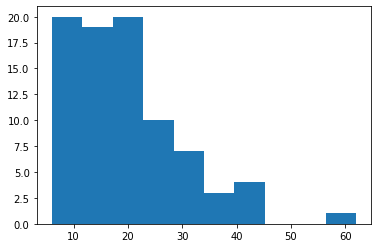

In [46]:
# 문자길이 시각화
import matplotlib.pyplot as plt
plt.hist(survey['length'])

### 형태소 분석
- 에러 확인 : pip install, 설치가 잘 안된다면 konlpy 에러 구글링해서 해결하기

In [51]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 29.6 MB/s eta 0:00:00


In [52]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.6.0'

In [57]:
from konlpy.tag import Twitter

In [58]:
twt = Twitter()
text = '여러분 정규식 많이 어렵나요? 표정이 밝지 못 해서 제 마음도 너무 슬프네요! 그래도 파이팅!!'
tagging = twt.pos(text)
tagging

[('여러분', 'Noun'),
 ('정규식', 'Noun'),
 ('많이', 'Adverb'),
 ('어렵나요', 'Adjective'),
 ('?', 'Punctuation'),
 ('표정', 'Noun'),
 ('이', 'Josa'),
 ('밝지', 'Verb'),
 ('못', 'Noun'),
 ('해서', 'Verb'),
 ('제', 'Noun'),
 ('마음', 'Noun'),
 ('도', 'Josa'),
 ('너무', 'Adverb'),
 ('슬프네요', 'Adjective'),
 ('!', 'Punctuation'),
 ('그래도', 'Adverb'),
 ('파이팅', 'Noun'),
 ('!!', 'Punctuation')]

survey 데이터에서 원하는 품사만 추출하기

In [59]:
survey

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [60]:
all_words = []
parts =['Josa']
for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr = []
    for n in words:
        if n =='EOS' or n =="":continue
        word_tmp=n[0]
        part = n[1]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['에', '이', '가', '이', '에', '가', '은', '한', '가', '가', '이', '이', '가', '를', '가', '이', '에', '이', '까지', '가', '를', '를', '이', '가', '이', '를', '을', '가', '이', '가', '이다', '을', '든', '에', '이', '가', '이다', '에', '를', '가', '하고', '의', '이', '의', '을', '가', '로', '가', '이', '에', '이', '가', '을', '이', '을', '이', '의', '가', '가', '에서는', '를', '고', '에', '이', '가', '에', '가', '를', '의', '을', '이', '가', '한', '가', '에', '이', '가', '의', '은', '가', '를', '의', '이', '하고', '가', '의', '은', '이', '에', '을', '가', '과', '를', '이', '에', '을', '의', '로', '을', '에', '이', '는', '이', '가', '를', '하고', '에', '가', '에', '가', '에', '를', '에', '가', '도', '를', '의', '가', '에', '를', '이', '이', '로', '가', '이', '가', '은', '에', '로', '가', '의', '이', '이', '이', '이라서', '에서도', '를', '에', '가', '을', '에', '이']
